<a href="https://colab.research.google.com/github/shekhar-banerjee96/dogsvscats/blob/master/Cnn_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 231MB/s]
100% 1.06G/1.06G [00:05<00:00, 223MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

### Generators - divide data in Batches , which get imported one by one and processed

In [5]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image , label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)


In [7]:
# create CNN Model

model = Sequential()


model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [9]:
history1 = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 142s 213ms/step - loss: 1.8860 - accuracy: 0.5680 - val_loss: 0.6492 - val_accuracy: 0.6324
Epoch 2/10
625/625 [==============================] - 134s 213ms/step - loss: 0.6584 - accuracy: 0.6366 - val_loss: 0.6127 - val_accuracy: 0.6962
Epoch 3/10
625/625 [==============================] - 134s 214ms/step - loss: 0.5846 - accuracy: 0.6923 - val_loss: 0.5516 - val_accuracy: 0.7200
Epoch 4/10
625/625 [==============================] - 134s 214ms/step - loss: 0.5493 - accuracy: 0.7230 - val_loss: 0.5549 - val_accuracy: 0.7252
Epoch 5/10
625/625 [==============================] - 136s 217ms/step - loss: 0.4902 - accuracy: 0.7592 - val_loss: 0.6323 - val_accuracy: 0.7098
Epoch 6/10
625/625 [==============================] - 136s 217ms/step - loss: 0.4553 - accuracy: 0.7866 - val_loss: 0.6178 - val_accuracy: 0.7138
Epoch 7/10
625/625 [==============================] - 134s 213ms/step - loss: 0.3810 - accuracy: 0.8242 - val_loss: 1.0802 -

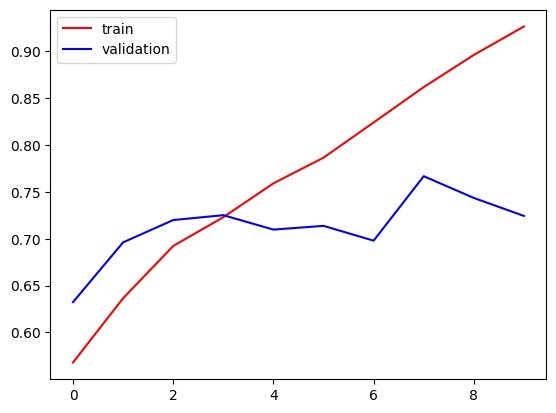

In [11]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

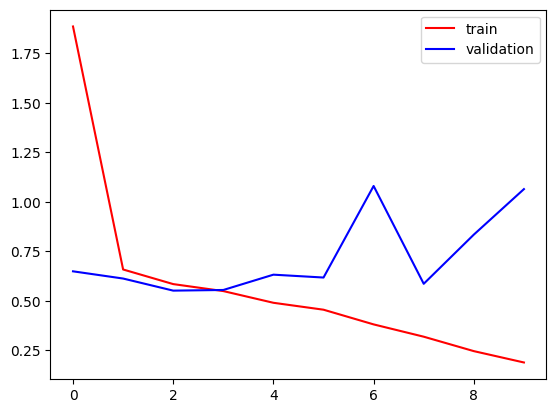

In [12]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()